# Классификация пород кошек и собак по лицу

Используем упрощенный датасет [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) с вырезанными лицами домашних животных. Для начала загружаем датасет:

In [129]:
!curl -o petfaces.tar.gz http://www.soshnikov.com/permanent/data/petfaces.tar.gz
!tar -xzf petfaces.tar.gz -C ./datasets/
!del petfaces.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 11 23.3M   11 2729k    0     0  4186k      0  0:00:05 --:--:--  0:00:05 4199k
 32 23.3M   32 7806k    0     0  4729k      0  0:00:05  0:00:01  0:00:04 4736k
 52 23.3M   52 12.2M    0     0  4724k      0  0:00:05  0:00:02  0:00:03 4728k
 73 23.3M   73 17.0M    0     0  4792k      0  0:00:04  0:00:03  0:00:01 4795k
 95 23.3M   95 22.1M    0     0  4886k      0  0:00:04  0:00:04 --:--:-- 4889k
100 23.3M  100 23.3M    0     0  4898k      0  0:00:04  0:00:04 --:--:-- 5009k


## Задаём параметры на будущее и смотрим датасет:

In [ ]:
dataset_path = 'datasets/petfaces'

IMG_HEIGHT = 30
IMG_WIDTH = 30
IMG_CHANNELS = 3

In [131]:
import os
CATEGORIES = os.listdir(dataset_path)
NUM_CATEGORIES = len(CATEGORIES)
print(CATEGORIES)

['cat_Abyssinian', 'cat_Bengal', 'cat_Birman', 'cat_Bombay', 'cat_British', 'cat_Egyptian', 'cat_Maine', 'cat_Persian', 'cat_Ragdoll', 'cat_Russian', 'cat_Siamese', 'cat_Sphynx', 'dog_american', 'dog_basset', 'dog_beagle', 'dog_boxer', 'dog_chihuahua', 'dog_english', 'dog_german', 'dog_great', 'dog_havanese', 'dog_japanese', 'dog_keeshond', 'dog_leonberger', 'dog_miniature', 'dog_newfoundland', 'dog_pomeranian', 'dog_pug', 'dog_saint', 'dog_samoyed', 'dog_scottish', 'dog_shiba', 'dog_staffordshire', 'dog_wheaten', 'dog_yorkshire']


In [132]:
CLASS_EDGE = 0
for i in range (1, NUM_CATEGORIES):
    if CATEGORIES[i-1][:3] != CATEGORIES[i][:3]:
        CLASS_EDGE = i
if CLASS_EDGE != 0:
    print(CLASS_EDGE, CATEGORIES[CLASS_EDGE-1], CATEGORIES[CLASS_EDGE])

12 cat_Sphynx dog_american


## Подготовим датасет к обучению

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib.image import imread
from PIL import Image
import numpy as np

images = []
labels = []

for breed_counter, breed in enumerate(os.listdir(dataset_path)):
    breed_path = os.path.join(dataset_path, breed)
    for img_name in os.listdir(breed_path):
        img_path = os.path.join(breed_path, img_name)
        image = imread(img_path)
        image_fromarray = Image.fromarray(image, 'RGB')
        image_resized = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        images.append(np.array(image_resized)/255)
        labels.append(breed_counter)

images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(
    images, 
    labels, 
    test_size=0.1, 
    random_state=42,
    stratify=labels 
)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images,
    train_labels,
    test_size=0.11,
    random_state=42,
    stratify=train_labels
)

print(f"Train: {len(train_images)} images")
print(f"Validation: {len(val_images)} images")
print(f"Test: {len(test_images)} images")

from collections import Counter
print("\nClass distribution in Train:", Counter(train_labels))
print("Class distribution in Validation:", Counter(val_labels))
print("Class distribution in Test:", Counter(test_labels))

Train: 2571 images
Validation: 318 images
Test: 322 images

Class distribution in Train: Counter({17: 146, 12: 140, 11: 80, 10: 80, 4: 80, 25: 78, 2: 78, 9: 77, 23: 76, 8: 76, 7: 76, 6: 76, 20: 75, 0: 74, 19: 73, 33: 73, 26: 72, 28: 72, 27: 71, 13: 70, 32: 69, 3: 69, 15: 68, 22: 67, 16: 67, 31: 66, 34: 65, 14: 62, 24: 60, 21: 60, 1: 60, 5: 59, 18: 55, 29: 54, 30: 47})
Class distribution in Validation: Counter({17: 18, 12: 17, 11: 10, 25: 10, 9: 10, 2: 10, 10: 10, 8: 10, 4: 10, 32: 9, 13: 9, 28: 9, 6: 9, 23: 9, 20: 9, 3: 9, 19: 9, 27: 9, 7: 9, 33: 9, 0: 9, 26: 9, 31: 8, 14: 8, 15: 8, 16: 8, 22: 8, 34: 8, 18: 7, 29: 7, 1: 7, 5: 7, 21: 7, 24: 7, 30: 6})
Class distribution in Test: Counter({17: 18, 12: 17, 9: 10, 10: 10, 4: 10, 8: 10, 6: 10, 23: 10, 11: 10, 2: 10, 25: 10, 28: 9, 27: 9, 33: 9, 20: 9, 26: 9, 19: 9, 32: 9, 7: 9, 3: 9, 15: 9, 13: 9, 0: 9, 16: 8, 14: 8, 31: 8, 24: 8, 22: 8, 34: 8, 29: 7, 21: 7, 18: 7, 5: 7, 1: 7, 30: 6})


## Посмотрим результаты обработки

24
dog_miniature


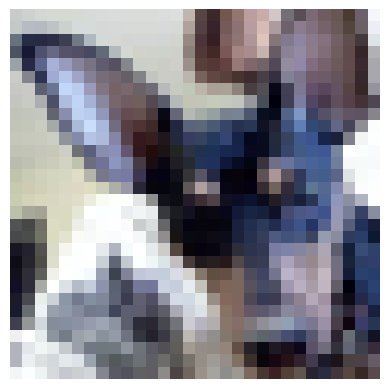

In [ ]:
import matplotlib.pyplot as plt

index = 0
image_for_show = train_images[index]
print(train_labels[index])
print(os.listdir(dataset_path)[train_labels[index]])
plt.imshow(image_for_show)
plt.axis('off')
plt.show()

## Сделаем классическую сеть классификации на основе принципов LeNet

Epoch 1/30
Train Loss: 2.6966, Acc: 0.2633
Val Loss: 2.0897, Acc: 0.4119, Top-3 Acc: 0.6667
Epoch 2/30
Train Loss: 1.6013, Acc: 0.5387
Val Loss: 1.7157, Acc: 0.4969, Top-3 Acc: 0.7453
Epoch 3/30
Train Loss: 0.9414, Acc: 0.7398
Val Loss: 1.7498, Acc: 0.5314, Top-3 Acc: 0.7547
Epoch 4/30
Train Loss: 0.5141, Acc: 0.8759
Val Loss: 1.4258, Acc: 0.5943, Top-3 Acc: 0.8302
Epoch 5/30
Train Loss: 0.2094, Acc: 0.9627
Val Loss: 1.3440, Acc: 0.6069, Top-3 Acc: 0.8491
Epoch 6/30
Train Loss: 0.0796, Acc: 0.9938
Val Loss: 1.3386, Acc: 0.6572, Top-3 Acc: 0.8208
Epoch 7/30
Train Loss: 0.0375, Acc: 0.9984
Val Loss: 1.2874, Acc: 0.6415, Top-3 Acc: 0.8302
Epoch 8/30
Train Loss: 0.0225, Acc: 1.0000
Val Loss: 1.3196, Acc: 0.6604, Top-3 Acc: 0.8113
Epoch 9/30
Train Loss: 0.0125, Acc: 1.0000
Val Loss: 1.2805, Acc: 0.6509, Top-3 Acc: 0.8365
Epoch 10/30
Train Loss: 0.0104, Acc: 1.0000
Val Loss: 1.2873, Acc: 0.6509, Top-3 Acc: 0.8396
Epoch 11/30
Train Loss: 0.0077, Acc: 1.0000
Val Loss: 1.3093, Acc: 0.6447, Top-

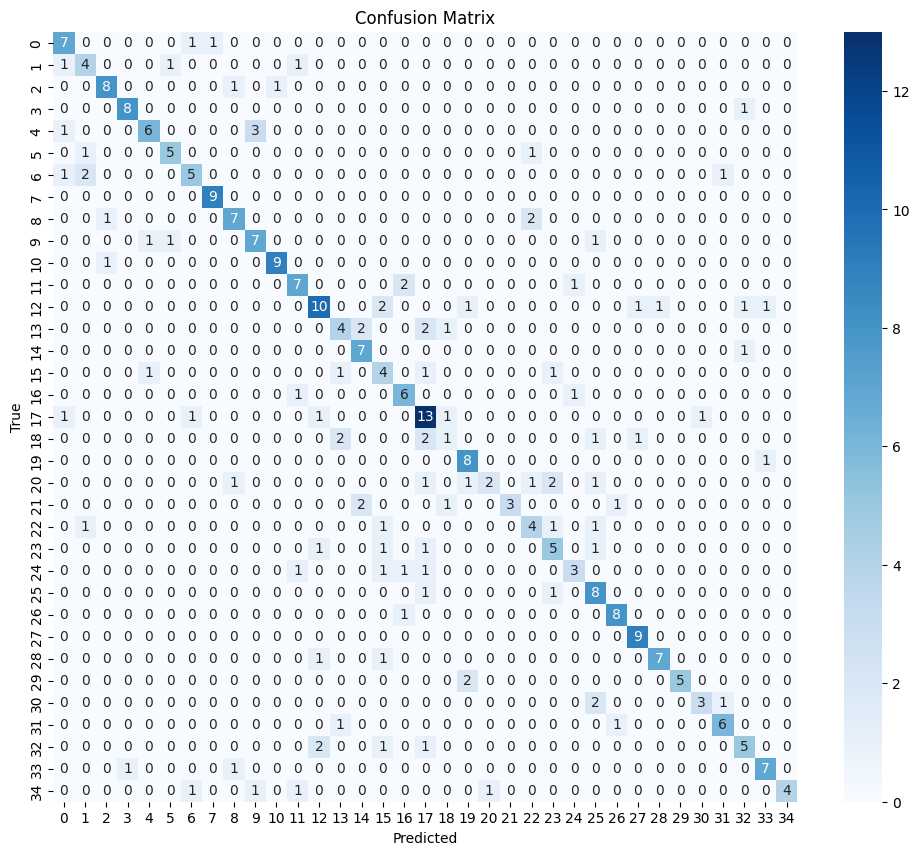

ТЕСТ


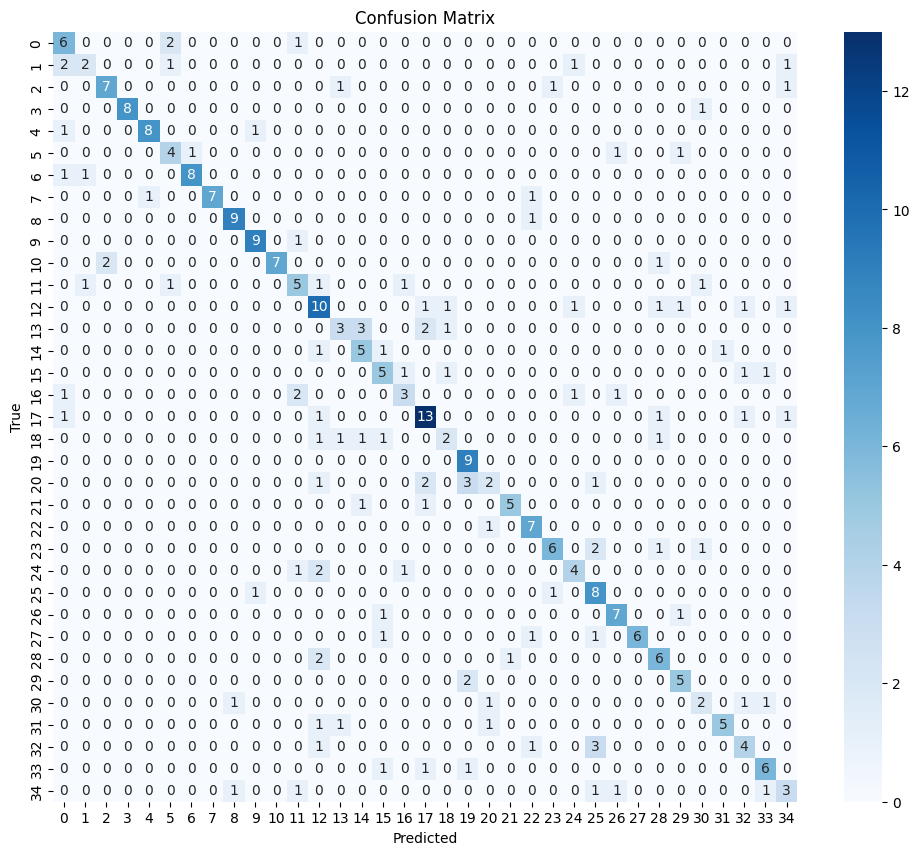

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR
import numpy as np
from sklearn.metrics import confusion_matrix, top_k_accuracy_score
import seaborn as sns

def prepare_dataloader(images, labels, batch_size=30, shuffle=True):
    images = torch.tensor(images.transpose(0, 3, 1, 2), dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)
    dataset = TensorDataset(images, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_loader = prepare_dataloader(train_images, train_labels, shuffle=True)
val_loader = prepare_dataloader(val_images, val_labels, shuffle=False)
test_loader = prepare_dataloader(test_images, test_labels, shuffle=False)

class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CATEGORIES):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(32),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(128),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_HEIGHT//4) * (IMG_WIDTH//4), 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x
    
device = torch.device('cuda')
model = CNN().to(device)

lr = 0.001
epochs = 30
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=epochs//2, gamma=0.1)

def train_model(model, train_loader, val_loader, epochs, optimizer, criterion, scheduler):
    best_val_acc = 0.0
    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0.0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            train_correct += torch.sum(preds == labels.data)
        
        scheduler.step()
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_correct.double() / len(train_loader.dataset)
        
        val_loss, val_acc, val_top3_acc = evaluate_model(model, val_loader, criterion)
        
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, Top-3 Acc: {val_top3_acc:.4f}')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')
    
    print(f'Best Val Acc: {best_val_acc:.4f}')

def evaluate_model(model, loader, criterion):
    model.eval()
    loss = 0.0
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item() * images.size(0)
            
            probs = torch.softmax(outputs, dim=1)
            all_probs.append(probs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())
    
    all_probs = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)
    
    loss = loss / len(loader.dataset)
    acc = (np.argmax(all_probs, axis=1) == all_labels).mean()
    top3_acc = top_k_accuracy_score(all_labels, all_probs, k=3)
    
    return loss, acc, top3_acc

train_model(model, train_loader, val_loader, epochs, optimizer, criterion, scheduler)

model.load_state_dict(torch.load('best_model.pth'))

test_loss, test_acc, test_top3_acc = evaluate_model(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}, Acc: {test_acc:.4f}, Top-3 Acc: {test_top3_acc:.4f}')

def plot_confusion_matrix(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

print("ВАЛИДАЦИЯ")
plot_confusion_matrix(model, val_loader)
print("ТЕСТ")
plot_confusion_matrix(model, test_loader)

## Сделаем из многоклассовой классификации бинарную

In [136]:
def evaluate_binary_model(model, loader, criterion, class_edge):
    
    model.eval()
    loss = 0.0
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss += criterion(outputs, labels).item() * images.size(0)
            
            _, preds = torch.max(outputs, 1)
            binary_preds = (preds >= class_edge).long()
            binary_labels = (labels >= class_edge).long()
            
            all_preds.append(binary_preds.cpu().numpy())
            all_labels.append(binary_labels.cpu().numpy())
    
    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)
    
    loss = loss / len(loader.dataset)
    acc = (all_preds == all_labels).mean()
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return loss, acc, conf_matrix

def plot_binary_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class < EDGE', 'Class >= EDGE'],
                yticklabels=['Class < EDGE', 'Class >= EDGE'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Binary Confusion Matrix')
    plt.show()

ВАЛИДАЦИЯ
LOSS: 1.3059409159534383, ACCURACY: 0.9339622641509434


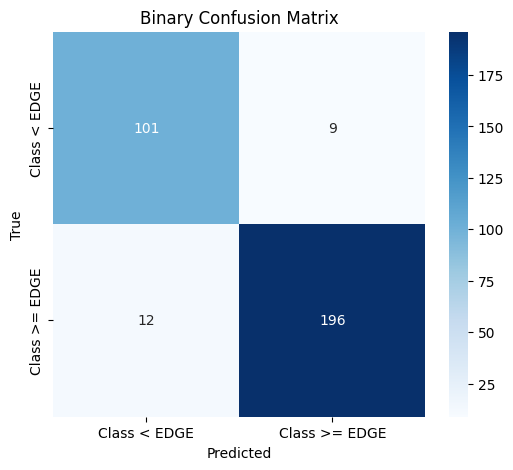

ТЕСТ
LOSS: 1.3268929905032518, ACCURACY: 0.9285714285714286


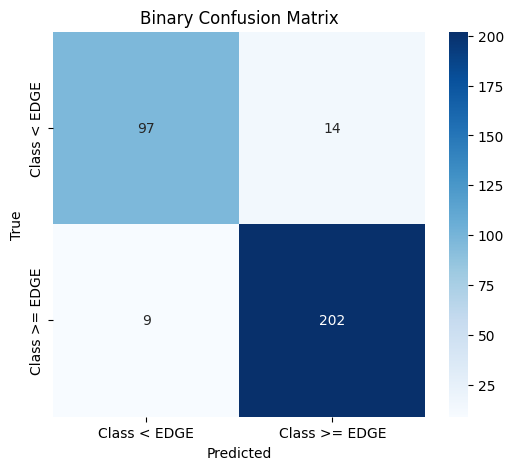

In [137]:
loss_val, acc_val, conf_matrix_val = evaluate_binary_model(model, val_loader, criterion, CLASS_EDGE)

print("ВАЛИДАЦИЯ")
print(f"LOSS: {loss_val}, ACCURACY: {acc_val}")
plot_binary_confusion_matrix(conf_matrix_val)

loss_test, acc_test, conf_matrix_test = evaluate_binary_model(model, test_loader, criterion, CLASS_EDGE)

print("ТЕСТ")
print(f"LOSS: {loss_test}, ACCURACY: {acc_test}")
plot_binary_confusion_matrix(conf_matrix_test)

## Сделаем подбор гиперпараметров через Optuna

In [ ]:
import os

import optuna
import torch.nn.functional as F

DEVICE = torch.device("cuda")
DIR = os.getcwd()
EPOCHS = 10


def define_model(trial):
    layers = []

    out_size = IMG_HEIGHT

    n_conv_layers = trial.suggest_int("n_conv_layers", 0, 2)

    convs_per_layer = trial.suggest_int("convs_per_layer", 1, 3)
    num_filters = [IMG_CHANNELS]+[trial.suggest_int("num_filter_"+str(i), 16, 128, step=16)
        for i in range(n_conv_layers*convs_per_layer)]

    padding = trial.suggest_int("padding", 0, 3)
    
    kernel = trial.suggest_int("kernel", 3, 5)
    
    use_pooling = trial.suggest_int("use_pooling", 0, 1)
    use_norm = trial.suggest_int("use_norm", 0, 1)
    use_dropout = trial.suggest_int("use_dropout", 0, 1)

    for index in range(1, n_conv_layers*convs_per_layer+1):
        layers.append(nn.Conv2d(in_channels=num_filters[index-1], out_channels=num_filters[index], kernel_size=(kernel, kernel), padding=padding))
        out_size = out_size - kernel + 1 + padding*2
        layers.append(nn.ReLU())
        if (index%convs_per_layer == 0):
            if (use_pooling):
                layers.append(nn.MaxPool2d(2, 2))
                out_size = out_size // 2
            if (use_norm):
                layers.append(nn.BatchNorm2d(num_filters[index]))

    filters_in = 3
    if n_conv_layers != 0:
        filters_in = num_filters[-1]

    in_features = out_size * out_size * filters_in

    n_dense_layers = trial.suggest_int("n_dense_layers", 1, 3)

    layers.append(nn.Flatten())

    for i in range(n_dense_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        if (use_norm):
            layers.append(nn.BatchNorm1d(out_features))
        if (use_dropout):
            p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
            layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, NUM_CATEGORIES))
    layers.append(nn.LogSoftmax(dim=1))
    
    #print(layers)

    return nn.Sequential(*layers)

def prepare_dataloader(images, labels, batch_size=32, shuffle=True):
    images = torch.tensor(images.transpose(0, 3, 1, 2), dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)
    dataset = TensorDataset(images, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

def objective(trial):
    model = define_model(trial).to(DEVICE)

    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    train_loader = prepare_dataloader(train_images, train_labels)
    valid_loader = prepare_dataloader(val_images, val_labels)
    
    #train_model(model, train_loader, val_loader, epochs, optimizer, criterion, scheduler)
    
    for epoch in range(EPOCHS):
        model.train()
        for data, target in train_loader:

            data, target = data.to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

        model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in valid_loader:
                data, target = data.to(DEVICE), target.to(DEVICE)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / len(valid_loader.dataset)

        trial.report(accuracy, epoch)
    
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    print("Статистика оптимизации:")
    print("Число выполненных шагов оптимизации:", len(study.trials))

    print("Лучшая попытка:")
    trial = study.best_trial

    print("Точность на попытке: ", trial.value)

    print("Лучшие параметры: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2025-04-25 10:09:10,183] A new study created in memory with name: no-name-f6880961-aa4d-4836-ab3a-b2bef43d9eb8


[I 2025-04-25 10:09:12,300] Trial 0 finished with value: 0.05642023346303502 and parameters: {'n_conv_layers': 1, 'convs_per_layer': 1, 'num_filter_0': 32, 'padding': 0, 'kernel': 3, 'use_pooling': 1, 'use_norm': 0, 'use_dropout': 0, 'n_dense_layers': 3, 'n_units_l0': 50, 'n_units_l1': 100, 'n_units_l2': 110, 'optimizer': 'Adam', 'lr': 0.05433083968236842}. Best is trial 0 with value: 0.05642023346303502.
[I 2025-04-25 10:09:16,382] Trial 1 finished with value: 0.3540856031128405 and parameters: {'n_conv_layers': 1, 'convs_per_layer': 3, 'num_filter_0': 80, 'num_filter_1': 64, 'num_filter_2': 128, 'padding': 1, 'kernel': 4, 'use_pooling': 1, 'use_norm': 1, 'use_dropout': 0, 'n_dense_layers': 2, 'n_units_l0': 117, 'n_units_l1': 72, 'optimizer': 'Adam', 'lr': 1.30210185860914e-05}. Best is trial 1 with value: 0.3540856031128405.
[I 2025-04-25 10:09:17,665] Trial 2 finished with value: 0.04085603112840467 and parameters: {'n_conv_layers': 0, 'convs_per_layer': 1, 'padding': 2, 'kernel': 3

Статистика оптимизации:
Число выполненных шагов оптимизации: 100
Лучшая попытка:
Точность на попытке:  0.556420233463035
Лучшие параметры: 
    n_conv_layers: 1
    convs_per_layer: 2
    num_filter_0: 48
    num_filter_1: 96
    padding: 1
    kernel: 4
    use_pooling: 1
    use_norm: 1
    use_dropout: 1
    n_dense_layers: 1
    n_units_l0: 121
    dropout_l0: 0.2342531895258807
    optimizer: Adam
    lr: 0.0002734521361163978


####  Вывод: чем больше фильтров, тем лучше; сжатие размерности, применение dropout и нормализация также стабилизируют результат. Можно сказать что Optuna не так эффективна, как в ML - грамотная архитектура важнее.